# Unsupervised Learning: A Deep Dive into K-Means Clustering

**Learning Objectives:**
- Understand the difference between supervised and unsupervised learning.
- Grasp the theory and intuition behind the K-Means clustering algorithm.
- Implement K-Means from preprocessing to prediction using Scikit-learn.
- Learn how to choose the optimal number of clusters ($K$) using the Elbow Method.
- Apply K-Means to a real-world problem: image compression.
- Recognize the strengths and limitations of the K-Means algorithm.

**Prerequisites:** Python basics, NumPy fundamentals, Pandas for data handling, and Matplotlib for visualization.

**Estimated Time:** ~60 minutes

---

Welcome to the fascinating world of unsupervised learning! Unlike supervised learning, where we have labeled data to guide our model, unsupervised learning is about finding hidden patterns and structures in data all on its own. It's a form of machine learning that acts like a detective, uncovering insights without any prior knowledge of the outcomes.

One of the most fundamental and widely used unsupervised algorithms is **K-Means Clustering**. This notebook will provide a comprehensive, professor-led tour of K-Means, from its theoretical underpinnings to its practical applications.

**🎯 Success Indicators:** By the end of this notebook, you will be able to:
- Explain the K-Means algorithm's objective and iterative process.
- Use Scikit-learn to train a K-Means model and interpret its output.
- Apply the Elbow Method to make a data-driven decision for choosing $K$.
- Build a complete pipeline to compress an image by reducing its color palette.

**💡 Professor's Tips for Beginners:**
- **Visualize Everything:** Clustering is a visual task. Plot your data before, during, and after to build strong intuition.
- **Understand the 'Why':** Don't just run the code. Focus on *why* each step, like feature scaling, is critical for distance-based algorithms like K-Means.
- **$K$ is Key:** The choice of $K$ is the most important hyperparameter you'll set. The Elbow Method is a great starting point, but the best $K$ often depends on the specific problem you're trying to solve.

Let's begin by setting up our environment.

In [1]:
# Essential imports for data manipulation, clustering, and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for K-Means and dataset creation
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Set a consistent style for our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Set a random seed for reproducibility of our results
np.random.seed(42)

print("🚀 Libraries loaded and environment set up successfully!")

🚀 Libraries loaded and environment set up successfully!


## 1. What is Clustering?

**Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar to each other than to those in other groups. Think of it as automatic categorization.

It's a core task in **unsupervised learning** because we don't provide the algorithm with any labels. We simply give it the data and ask, "What are the natural groups here?"

**Real-world Applications:**
- **Customer Segmentation**: Grouping customers by purchasing behavior for targeted marketing campaigns.
- **Image Segmentation**: Grouping pixels to identify objects in an image.
- **Anomaly Detection**: Identifying outliers that don't belong to any group (e.g., fraud detection).
- **Genomics**: Clustering genes with similar expression patterns to identify their functions.


## 2. The K-Means Algorithm: Theory and Intuition

K-Means is a **centroid-based clustering** algorithm. This means it works by identifying cluster centers (centroids) and assigning each data point to the nearest center. The $K$ in K-Means simply refers to the **number of clusters** you want to find, which you have to specify in advance.

### The Goal: Minimizing Inertia

The core objective of K-Means is to minimize the **within-cluster sum of squares (WCSS)**, also known as **inertia** or **distortion**. This is the sum of the squared distances between each data point and its assigned cluster's centroid.

The objective function, $J$, is defined as:
$$ J = \sum_{i=1}^{m} \sum_{k=1}^{K} w_{ik} ||x^{(i)} - \mu_k||^2 $$

Where:
- $m$ is the number of data points.
- $K$ is the number of clusters.
- $x^{(i)}$ is the $i$-th data point.
- $\mu_k$ is the centroid of the $k$-th cluster.
- $w_{ik}$ is 1 if point $x^{(i)}$ is in cluster $k$, and 0 otherwise.

In simple terms, K-Means tries to make the clusters as tight and dense as possible.

### The Iterative Process

K-Means finds the best centroids through a simple, iterative two-step process:

1.  **Assignment Step**: Assign each data point $x^{(i)}$ to its *closest* centroid $\mu_k$. "Closest" is measured by the squared Euclidean distance.
2.  **Update Step**: Recalculate the centroid of each cluster by taking the *mean* of all data points assigned to it.

This process is repeated until the cluster assignments no longer change, meaning the algorithm has **converged**.

## 3. K-Means in Practice with a Toy Dataset

Theory is great, but let's see K-Means in action. We'll start with a simple 2D dataset that is easy to visualize. Scikit-learn's `make_blobs` function is perfect for this.

### 3.1. Generating and Exploring the Dataset

First, let's create our data. We'll generate 300 points grouped into 4 distinct clusters.

Shape of our feature matrix (X): (300, 2)
First 5 data points:
[[ -9.20581648   6.64364742]
 [ -9.52665845   7.01587848]
 [ -1.85116169   8.03761121]
 [ -7.05377215  -6.00108811]
 [-10.46882738   6.51705387]]


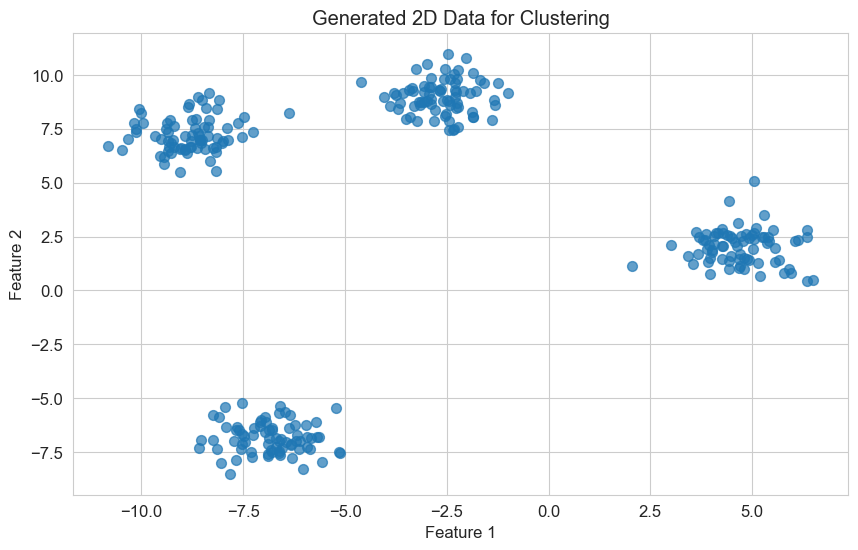

In [2]:
# Generate synthetic 2D data with 4 clusters
X, y_true = make_blobs(
    n_samples=300, 
    centers=4, 
    cluster_std=0.80, 
    random_state=42
)

print(f"Shape of our feature matrix (X): {X.shape}")
print(f"First 5 data points:\n{X[:5]}")

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.title('Generated 2D Data for Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

As we can see, the data is clearly grouped, making it a perfect candidate for K-Means.

### 3.2. Applying the Scikit-learn K-Means Model

Scikit-learn provides a consistent and easy-to-use API for all its models. The pattern is always:
1. **Instantiate** the model, setting its hyperparameters.
2. **Fit** the model to the data.
3. **Predict** or inspect the results.

Let's apply this to our data. We already know the ground truth is 4 clusters, so we'll set `n_clusters=4`.

In [3]:
# 1. Instantiate the KMeans model
# PARAMETER EXPLANATION:
# • n_clusters: The number of clusters (K) to form. This is the most important hyperparameter.
# • n_init: The number of times the algorithm will be run with different initial centroid seeds. 
#   The final result will be the best output in terms of inertia. 'auto' is a good default.
# • random_state: Ensures that the initialization of centroids is reproducible.
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)

# 2. Fit the model to the data
kmeans.fit(X)

# 3. Get the cluster assignments and centroids
y_kmeans = kmeans.predict(X) # Get cluster label for each point
cluster_centers = kmeans.cluster_centers_ # Get the coordinates of the centroids
inertia = kmeans.inertia_ # Get the final WCSS value

print(f"Cluster labels for the first 10 points: {y_kmeans[:10]}")
print(f"Coordinates of the 4 cluster centers:\n{cluster_centers}")
print(f"Final Inertia (WCSS): {inertia:.2f}")

Cluster labels for the first 10 points: [3 3 0 1 3 1 2 1 0 2]
Coordinates of the 4 cluster centers:
[[-2.63715917  8.98563949]
 [-6.84180708 -6.84038791]
 [ 4.70253968  2.02807134]
 [-8.83330596  7.21790214]]
Final Inertia (WCSS): 362.47


### 3.3. Visualizing the Clustering Results

Now that the model has assigned each point to a cluster, let's visualize the result. We'll create a scatter plot where each point is colored according to its assigned cluster label, and we'll mark the final centroids.

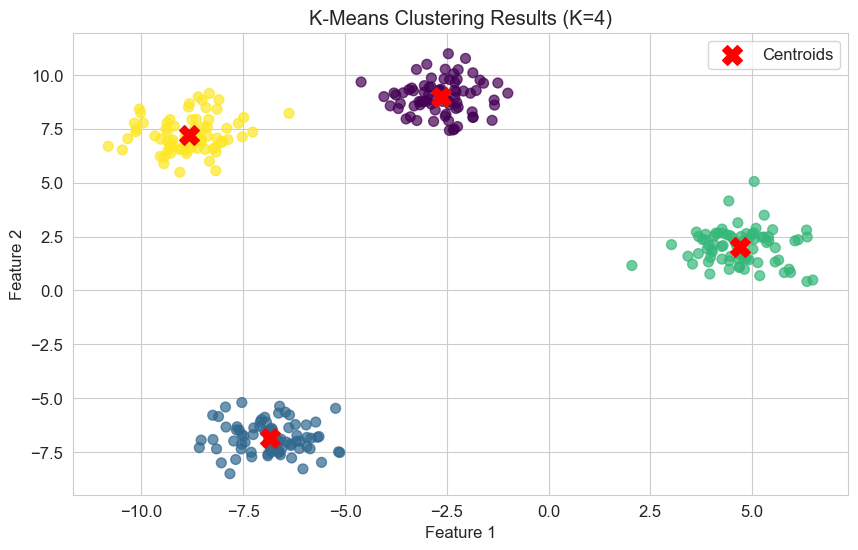

In [4]:
# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)

# Plot the final centroids as red 'X' marks
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('K-Means Clustering Results (K=4)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Success! The K-Means algorithm successfully identified the four distinct groups in our data.

## 4. How to Choose the Right Number of Clusters ($K$)

In our toy example, we knew to set $K=4$. But in the real world, you rarely know the optimal number of clusters beforehand. This is one of the main challenges of K-Means.

A popular and intuitive technique to help find a good value for $K$ is the **Elbow Method**.

**The Elbow Method Logic:**
1. Run K-Means for a range of different $K$ values (e.g., $K$ from 1 to 10).
2. For each $K$, calculate the **inertia (WCSS)**.
3. Plot $K$ against the inertia.
4. Look for an "elbow" in the plot. This is the point where the rate of decrease in inertia sharply slows down. This point suggests the last effective number of clusters.

The intuition is that adding more clusters beyond the elbow point yields diminishing returns and is essentially just subdividing already tight clusters.

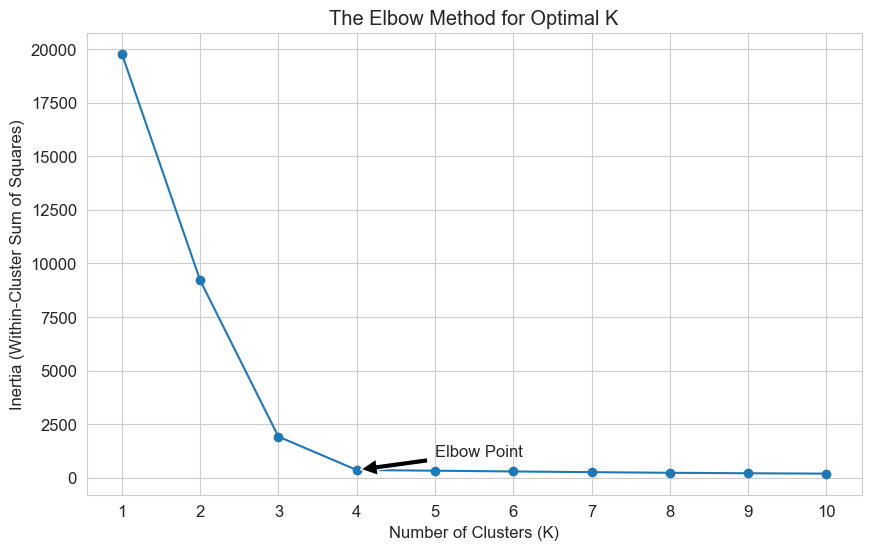

In [5]:
# Calculate inertia for a range of K values
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('The Elbow Method for Optimal K')
plt.xticks(k_range)
plt.annotate('Elbow Point', xy=(4, inertia_values[3]), xytext=(5, 1000), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

The plot clearly shows an "elbow" at **$K=4$**. For $K>4$, the drop in inertia becomes much less significant. This confirms that 4 is a good choice for our dataset.

## 5. Real-World Application: Image Compression

Now, let's apply K-Means to a more complex and practical problem: **image compression**.

A standard digital image (like a PNG) represents each pixel's color using RGB (Red, Green, Blue) values. Each of these values is an 8-bit integer from 0 to 255. This means a single image can contain thousands or even millions of distinct colors.

We can use K-Means to reduce the number of colors in an image to a smaller palette of $K$ representative colors. This is a form of **quantization**.

**How it works:**
1.  **Treat each pixel as a data point** in a 3-dimensional (R, G, B) space.
2.  Run K-Means with a chosen $K$ (e.g., 16) to find the $K$ most common or representative colors. These $K$ colors will be our new palette (the cluster centroids).
3.  **Re-color the image** by replacing each pixel's original color with the centroid color of the cluster it was assigned to.

This compresses the image because instead of storing the full 24-bit RGB value for every pixel, we only need to store the small palette of $K$ colors and a tiny index (e.g., 4 bits for 16 colors) for each pixel.

### 5.1. Load and Prepare the Image Data
We'll use a sample image of a bird. First, we load it and inspect its properties.

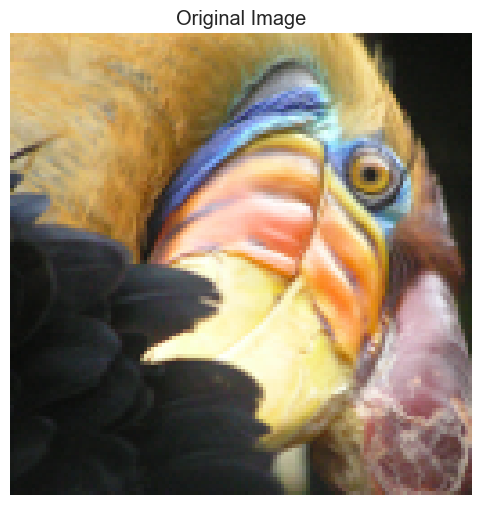

Original image shape: (128, 128, 3)
Data type: float32
Color value range: 0.0235294122248888 to 1.0


In [6]:
# Load the image
# Note: The 'bird_small.png' image should be in the same directory as this notebook.
try:
    original_img = plt.imread('data/bird_small.png')
except FileNotFoundError:
    # If the file is not found, we can use a placeholder from an online source
    print("Local 'bird_small.png' not found. Using a placeholder image.")
    import requests
    from PIL import Image
    from io import BytesIO
    url = 'https://raw.githubusercontent.com/dibgerge/ml-coursera-python-assignments/master/Exercise7/data/bird_small.png'
    response = requests.get(url)
    img_pil = Image.open(BytesIO(response.content))
    original_img = np.array(img_pil)

# Display the original image
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Inspect the image data
print(f"Original image shape: {original_img.shape}")
print(f"Data type: {original_img.dtype}")
print(f"Color value range: {original_img.min()} to {original_img.max()}")

The image is 128x128 pixels, and each pixel has 3 values (R, G, and B). For K-Means to work, we need a 2D array where each row is a data point and each column is a feature. In our case, a data point is a pixel and the features are its R, G, and B values.

We will now:
1.  **Normalize** the data by dividing by 255, so all values are between 0 and 1. This is good practice for many ML algorithms.
2.  **Reshape** the `(128, 128, 3)` array into a `(16384, 3)` array, where $16384 = 128 \times 128$.

In [7]:
# Normalize pixel values to be between 0 and 1
img_normalized = original_img / 255.0

# Reshape the image into a 2D array of pixels
pixel_data = img_normalized.reshape(-1, 3)

print(f"Shape of the reshaped pixel data: {pixel_data.shape}")
print(f"Number of pixels (data points): {pixel_data.shape[0]}")
print(f"Number of features (R, G, B): {pixel_data.shape[1]}")

Shape of the reshaped pixel data: (16384, 3)
Number of pixels (data points): 16384
Number of features (R, G, B): 3


### 5.2. Run K-Means to Find the Dominant Colors

Now we can run K-Means on our `pixel_data`. We'll choose $K=16$ to create a 16-color palette. The `cluster_centers_` found by the algorithm will be our new colors.

In [8]:
# Set the number of colors for our new palette
K_colors = 16

print(f"Running K-Means to find the {K_colors} most representative colors...")

# Instantiate and fit the KMeans model
kmeans_img = KMeans(n_clusters=K_colors, n_init='auto', random_state=42)
kmeans_img.fit(pixel_data)

# The new color palette is the set of cluster centroids
new_palette = kmeans_img.cluster_centers_

# The labels tell us which palette color each original pixel belongs to
pixel_labels = kmeans_img.labels_

print(f"Successfully found a new {K_colors}-color palette.")
print(f"Shape of the new palette: {new_palette.shape}")

Running K-Means to find the 16 most representative colors...
Successfully found a new 16-color palette.
Shape of the new palette: (16, 3)


### 5.3. Reconstruct the Image and Compare

The final step is to create the compressed image. We can do this easily by creating a new array of colors based on the labels assigned by K-Means. `new_palette[pixel_labels]` will map each pixel's label back to its assigned centroid color.

Then, we reshape this array back to the original image dimensions `(128, 128, 3)`.

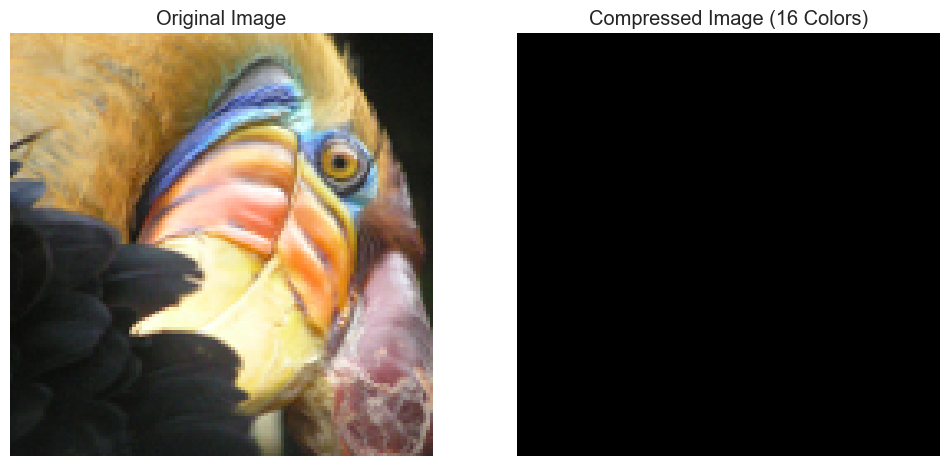

🎯 Notice how the compressed image retains the main features while using only 16 colors!


In [9]:
# Reconstruct the image using the new palette and pixel labels
compressed_pixel_data = new_palette[pixel_labels]

# Reshape the data back to the original image dimensions
compressed_img = compressed_pixel_data.reshape(original_img.shape)

# Display the original and compressed images side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(original_img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(compressed_img)
ax[1].set_title(f'Compressed Image ({K_colors} Colors)')
ax[1].axis('off')

plt.show()

print("🎯 Notice how the compressed image retains the main features while using only 16 colors!")

## 6. K-Means: Strengths and Weaknesses

K-Means is a powerful and intuitive algorithm, but it's important to understand its limitations.

**Strengths of K-Means:**
- **Simplicity and Speed**: It's easy to understand and computationally efficient, making it great for large datasets.
- **Scalability**: It scales well to a large number of samples.
- **Guaranteed Convergence**: The algorithm is guaranteed to converge to a solution (though it might be a local minimum).

**Weaknesses of K-Means:**
- **Need to Specify $K$**: The biggest drawback is having to choose the number of clusters, $K$, in advance.
- **Sensitivity to Initialization**: The final clusters can depend on the initial placement of centroids. Scikit-learn mitigates this by running the algorithm multiple times with different initializations (`n_init`).
- **Assumes Spherical Clusters**: K-Means works best when clusters are spherical and roughly equal in size. It struggles with clusters of irregular shapes or varying densities.
- **Sensitivity to Outliers**: Since centroids are based on the mean, outliers can significantly pull them off-center.

Here's a visual example where K-Means would fail to identify non-convex clusters:

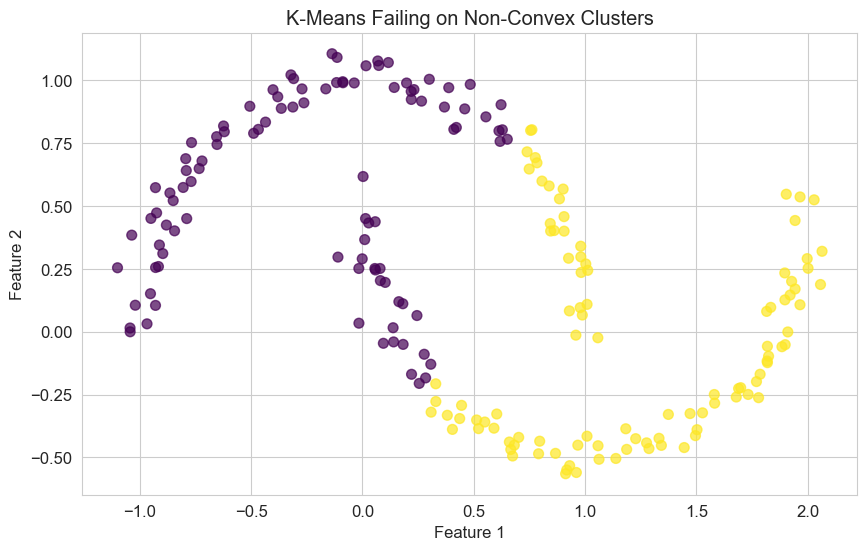

💡 For data like this, density-based algorithms like DBSCAN are a better choice.


In [10]:
# Generate moon-shaped data where K-Means struggles
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(200, noise=.05, random_state=42)

# Apply K-Means with K=2
kmeans_moons = KMeans(n_clusters=2, n_init='auto', random_state=42)
labels_moons = kmeans_moons.fit_predict(X_moons)

# Visualize the incorrect clustering
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, s=50, cmap='viridis', alpha=0.7)
plt.title('K-Means Failing on Non-Convex Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print("💡 For data like this, density-based algorithms like DBSCAN are a better choice.")

## 7. Summary and Next Steps

Congratulations! You've successfully taken a deep dive into the K-Means clustering algorithm.

**What We've Covered:**
- ✅ The fundamentals of **unsupervised learning** and **clustering**.
- ✅ The **theory and intuition** behind K-Means, including its objective function (inertia) and the assign-update iterative process.
- ✅ A hands-on implementation of K-Means on a **toy dataset** using Scikit-learn.
- ✅ A practical method for choosing the optimal number of clusters, $K$, using the **Elbow Method**.
- ✅ A detailed, real-world application of K-Means for **image compression**.
- ✅ A balanced look at the **strengths and weaknesses** of the algorithm.

**Key Takeaways:**
- K-Means is a fast and effective algorithm for identifying spherical, evenly-sized clusters.
- Choosing the right $K$ is a critical, and often subjective, part of the process.
- For distance-based algorithms like K-Means, feature scaling is crucial.
- Always be aware of the algorithm's limitations and consider alternatives (like DBSCAN) for complex cluster shapes.

**Next Steps in Your Journey:**
- **Explore other clustering algorithms**: Look into `DBSCAN` for density-based clustering and `Hierarchical Clustering` for creating nested clusters.
- **Dimensionality Reduction**: Before clustering, you can often improve results by using techniques like `Principal Component Analysis (PCA)` to reduce the number of features.
- **Cluster Evaluation Metrics**: Dive deeper into metrics like the `Silhouette Score` to evaluate the quality of your clusters quantitatively.